In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8592 - loss: 0.4818 - val_accuracy: 0.9602 - val_loss: 0.1371
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9649 - loss: 0.1161 - val_accuracy: 0.9655 - val_loss: 0.1166
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0766 - val_accuracy: 0.9687 - val_loss: 0.1057
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0586 - val_accuracy: 0.9722 - val_loss: 0.0997
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9708 - val_loss: 0.1024
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8803 - loss: 0.3861 - val_accuracy: 0.9765 - val_loss: 0.0761
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.9822 - val_loss: 0.0600
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9877 - loss: 0.0385 - val_acc

C:\Users\ibmuser\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ibmuser\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ibmuser\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ibmuser\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close

KNN Test Accuracy: 0.9452
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


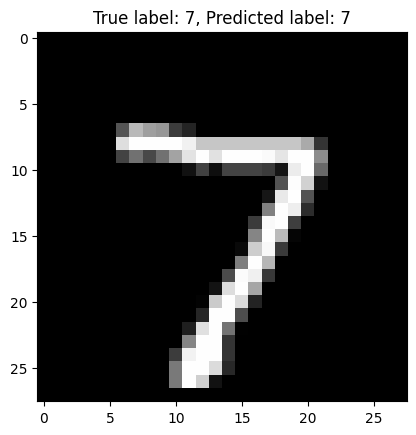

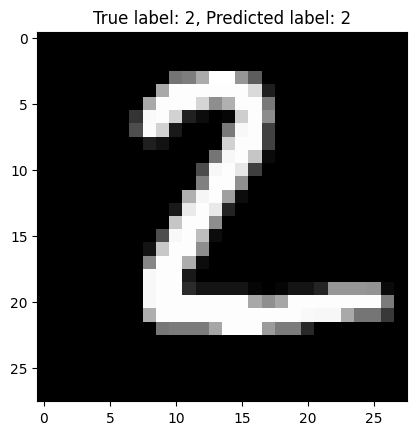

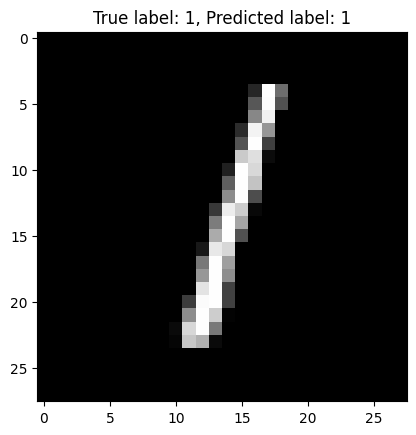

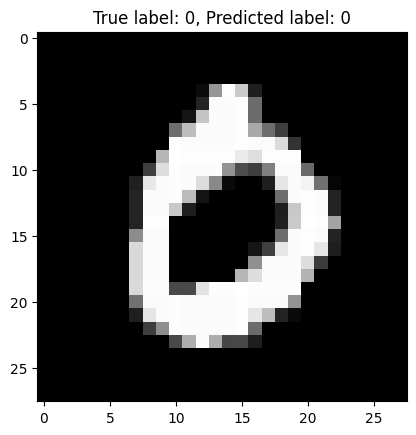

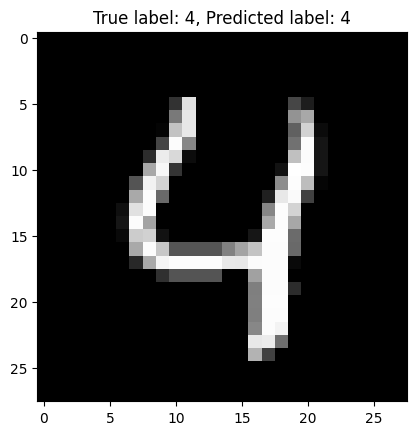

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf


# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# ANN and CNN preprocessing
X_train_cnn = X_train.reshape(-1, 28, 28, 1)  # Reshape for CNN
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
y_train_oh = to_categorical(y_train, 10)  # One-hot encode labels
y_test_oh = to_categorical(y_test, 10)

# Define the ANN model using Input layer
ann_model = Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Add Input layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train, y_train_oh, epochs=5, batch_size=32, validation_split=0.2)

# Define the CNN model
cnn_model = Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Use Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_oh, epochs=5, batch_size=32, validation_split=0.2)

# KNN preprocessing
X_train_knn = X_train.reshape(-1, 28*28)  # Flatten images for KNN
X_test_knn = X_test.reshape(-1, 28*28)

# Standardize the features
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, y_train)

# Predict and evaluate the KNN model
y_test_pred_knn = knn.predict(X_test_knn)
knn_accuracy = accuracy_score(y_test, y_test_pred_knn)
print(f'KNN Test Accuracy: {knn_accuracy:.4f}')

# Predict using the CNN model
predictions = cnn_model.predict(X_test_cnn)

# Display the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True label: {y_test[i]}, Predicted label: {np.argmax(predictions[i])}")
    plt.show()

In [5]:
#MNIST DATASET 

#IMPORT THE NECCESSARY LIBRAEEIES FOR THE APP

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#load the mnist dataset 
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#normalize the dataset
x_train,x_test = x_train /255.0, x_test/255.0

#reshape the data for cnn
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

#one-hot encoding for ann and cnn in data
y_train_oh = to_categorical(y_train,10)
y_test_oh = to_categorical(y_test,10)

#build an ann model
#the images into 28*28 for the 1D vectors
ann_model =Sequential([
    Flatten(input_shape=(28,28))
])

#first hidden layer
Dense(128, activation= 'relu')

#second hidden layer
Dense(64,activation='relu')

Dense(10,activation='softmax')

#compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train, y_train_oh, epochs=5, batch_size=32, validation_split=0.2)



#BUILD the cnn model
#first convoluntional layer

cnn_model = Sequential([Conv2D(32,(3,3),activation ='relu',input_shape=(28,28,1)),
#pool layer 
MaxPooling2D((2,2)),
#flattend the feature to 1 deminsion vector
Flatten(),
#fully connected layer
Dense(64,activation='relu'),
#output layer
Dense(10,activation='softmax'),
])
#complie our model
#compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
cnn_model.fit(x_train,y_train_oh,epochs=5,batch_size=32,validation_data =0.2)

#build the model with knn
x_train_knn = x_train.reshape(-1,28*28)
x_test_knn = x_train.reshape(-1,28*28)

#standarzation of the data
scaler = StandardScaler()
x_train_knn = scaler.fit_transform(x_train_knn)
x_test_knn = scaler.fit_transform(x_train_knn)

#create the model
knn_model = KNeighborsClassifier(n_neighbors=3)

#train the model
knn_model.fit(x_train_knn,y_train)

knn_accuracy = knn_model.score(x_test_cnn,y_test)

print(f"KNN Accuracy: {knn_accuracy*100:2f}%")

#the prediction with cnn
predictions = cnn_model.predict(x_test_cnn)
 
for i in range(5):
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f"True:{y_test[i]},predicted:{np.argmax(predictions[i])}")
    plt.show()


Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(32, 10), output.shape=(32, 784)